In [1]:
from neo4j import GraphDatabase
import matplotlib.pyplot as plt
from IPython.display import Image

Neo4j connection

In [2]:
class Neo4jService:
    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()

    def run_query(self, query):
        with self._driver.session() as session:
            return session.run(query)


In [3]:
uri = "neo4j+s://fd6f1907.databases.neo4j.io"
username = "neo4j"
password = "54i9EwHd8tmjQEfnpBWjAYeOFcCVsjoHyayaABFqlno"

# Create a Neo4j driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

def query_neo(tx, query):
    tx.run(query)

In [4]:
# Create Player nodes

players_query = (
        """
        CREATE 
    (p1:Player {id: 1, username: "JohnDoe", inventory: ["Sword", "Shield", "Health Potion"]}),
    (p2:Player {id: 2, username: "JaneSmith", inventory: ["Bow", "Arrow", "Mana Potion"]}),
    (p3:Player {id: 3, username: "JimBeam", inventory: ["Magic Wand", "Spellbook"]}),
    (p4:Player {id: 4, username: "SaraConnor", inventory: ["Dagger", "Stealth Cloak"]}),
    (p5:Player {id: 5, username: "TomCruise", inventory: ["Sword", "Health Potion", "Map"]}),
    (p6:Player {id: 6, username: "EllenPage", inventory: ["Scepter", "Royal Crown"]}),
    (p7:Player {id: 7, username: "ChrisEvans", inventory: ["Shield", "Health Elixir"]}),
    (p8:Player {id: 8, username: "ScarlettJ", inventory: ["Bow", "Arrow", "Stealth Boots"]}),
    (p9:Player {id: 9, username: "HughJackman", inventory: ["Claws", "Healing Potion"]}),
    (p10:Player {id: 10, username: "EmmaWatson", inventory: ["Spellbook", "Magic Wand", "Broom"]});
        """
    )    
    
with driver.session() as session:
    session.execute_write(query_neo, players_query)

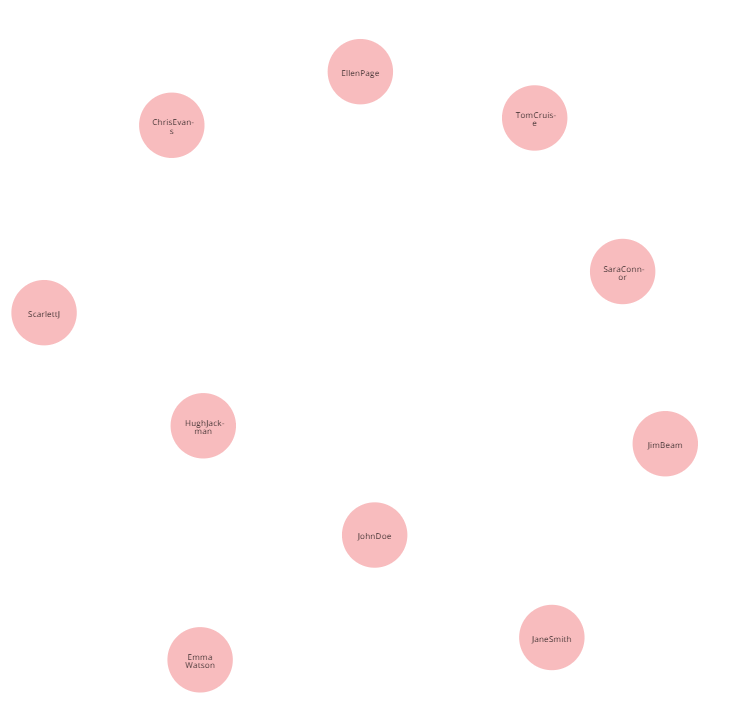

In [5]:
Image(filename="players.png")

In [6]:
# Create Quest nodes
quests_query = (
        """
CREATE 
    (q1:Quest {id: 1, difficultyLevel: 3, questGiver: 249, questName: "The Lost Artifact", xpReward: 500}),
    (q2:Quest {id: 2, difficultyLevel: 2, questGiver: 258, questName: "Defeat the Dragon", xpReward: 700}),
    (q3:Quest {id: 3, difficultyLevel: 4, questGiver: 273, questName: "Rescue the Princess", xpReward: 600}),
    (q4:Quest {id: 4, difficultyLevel: 1, questGiver: 276, questName: "Gather Magic Herbs", xpReward: 200}),
    (q5:Quest {id: 5, difficultyLevel: 5, questGiver: 287, questName: "Infiltrate the Dark Fortress", xpReward: 750}),
    (q6:Quest {id: 6, difficultyLevel: 3, questGiver: 298, questName: "Protect the Village", xpReward: 450}),
    (q7:Quest {id: 7, difficultyLevel: 2, questGiver: 312, questName: "Retrieve the Stolen Sword", xpReward: 350}),
    (q8:Quest {id: 8, difficultyLevel: 1, questGiver: 315, questName: "Escort the Merchant", xpReward: 150}),
    (q9:Quest {id: 9, difficultyLevel: 4, questGiver: 321, questName: "Seal the Cursed Tomb", xpReward: 650}),
    (q10:Quest {id: 10, difficultyLevel: 5, questGiver: 323, questName: "Vanquish the Evil Sorcerer", xpReward: 750});
"""
    )

with driver.session() as session:
    session.execute_write(query_neo, quests_query)

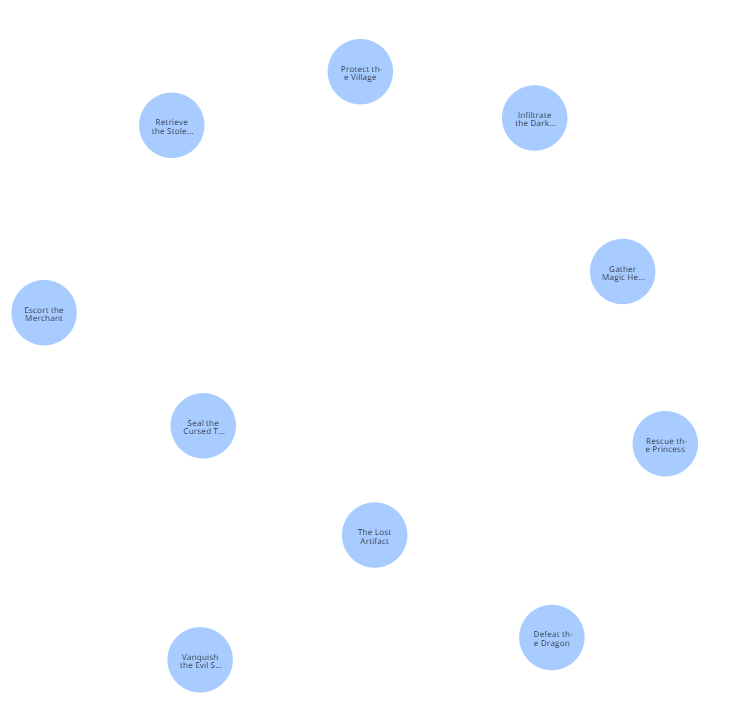

In [7]:
Image(filename="quests.png")

In [8]:
# Create NPC nodes
npcs_query = (
        """
CREATE 
    (npc1:NPC {id: 1, type: "Lore_Masters", firstName: "Tyrdar", lastName: "Stoneshield"}),
    (npc2:NPC {id: 2, type: "Shopkeepers", firstName: "ThaeLis", lastName: "Deeproot"}),
    (npc3:NPC {id: 3, type: "Shopkeepers", firstName: "Valeria", lastName: "Dragonfang"}),
    (npc4:NPC {id: 4, type: "Quest-givers", firstName: "Zandalar", lastName: "Dusksheart"}),
    (npc5:NPC {id: 5, type: "Skill_Trainers", firstName: "Lythor", lastName: "Sunspire"}),
    (npc6:NPC {id: 6, type: "Lore_Masters", firstName: "LyrieLle", lastName: "Skyshard"}),
    (npc7:NPC {id: 7, type: "Lore_Masters", firstName: "ToraeLl", lastName: "GoldenLeaf"}),
    (npc8:NPC {id: 8, type: "Skill_Trainers", firstName: "Valeria", lastName: "Moonshard"}),
    (npc9:NPC {id: 9, type: "Quest-givers", firstName: "Endora", lastName: "Silverbow"}),
    (npc10:NPC {id: 10, type: "Shopkeepers", firstName: "LaeLor", lastName: "Dreadbane"});
"""
    )

with driver.session() as session:
    session.execute_write(query_neo, npcs_query)

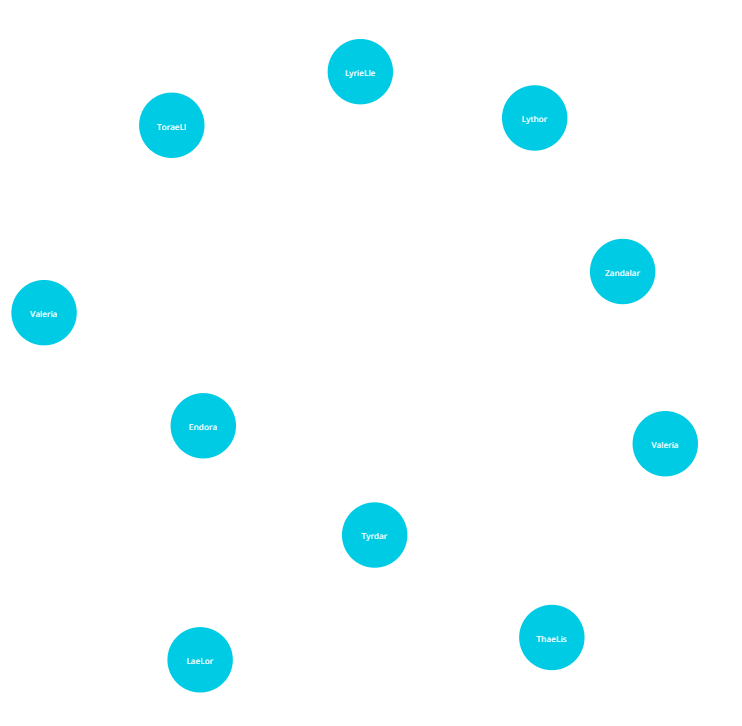

In [9]:
Image(filename="npcs.png")

In [10]:
# Add PARTICIPATED_IN relationships

participated_queries = [
        """
MATCH (p1:Player {id: 1}), (q1:Quest {id: 1})
CREATE (p1)-[:PARTICIPATED_IN {items_collected: ["Artifact"], points_scored: 250, time_taken: "2 hours"}]->(q1);
""",
"""
MATCH (p2:Player {id: 2}), (q2:Quest {id: 2})
CREATE (p2)-[:PARTICIPATED_IN {items_collected: ["Dragon Tooth"], points_scored: 500, time_taken: "3 hours"}]->(q2);
""",
"""
MATCH (p3:Player {id: 3}), (q3:Quest {id: 3})
CREATE (p3)-[:PARTICIPATED_IN {items_collected: ["Princess' Amulet"], points_scored: 450, time_taken: "4 hours"}]->(q3);
""",
"""
MATCH (p4:Player {id: 4}), (q4:Quest {id: 4})
CREATE (p4)-[:PARTICIPATED_IN {items_collected: ["Magic Herb"], points_scored: 120, time_taken: "30 minutes"}]->(q4);
""",
"""
MATCH (p5:Player {id: 5}), (q5:Quest {id: 5})
CREATE (p5)-[:PARTICIPATED_IN {items_collected: ["Dark Fortress Map"], points_scored: 650, time_taken: "5 hours"}]->(q5);
""",
"""
MATCH (p6:Player {id: 6}), (q6:Quest {id: 6})
CREATE (p6)-[:PARTICIPATED_IN {items_collected: ["Village Emblem"], points_scored: 300, time_taken: "2.5 hours"}]->(q6);
""",
"""
MATCH (p7:Player {id: 7}), (q7:Quest {id: 7})
CREATE (p7)-[:PARTICIPATED_IN {items_collected: ["Stolen Sword"], points_scored: 280, time_taken: "2 hours"}]->(q7);
""",
"""
MATCH (p8:Player {id: 8}), (q8:Quest {id: 8})
CREATE (p8)-[:PARTICIPATED_IN {items_collected: ["Merchant's Token"], points_scored: 100, time_taken: "1 hour"}]->(q8);
""",
"""
MATCH (p9:Player {id: 9}), (q9:Quest {id: 9})
CREATE (p9)-[:PARTICIPATED_IN {items_collected: ["Cursed Tomb Key"], points_scored: 550, time_taken: "4.5 hours"}]->(q9);
""",
"""
MATCH (p10:Player {id: 10}), (q10:Quest {id: 10})
CREATE (p10)-[:PARTICIPATED_IN {items_collected: ["Sorcerer's Crystal"], points_scored: 700, time_taken: "5.5 hours"}]->(q10);
""",
"""
MATCH (p2:Player {id: 2}), (q1:Quest {id: 1})
CREATE (p2)-[:PARTICIPATED_IN {items_collected: ["Artifact"], points_scored: 250, time_taken: "2 hours"}]->(q1);
""",
"""
MATCH (p3:Player {id: 3}), (q9:Quest {id: 9})
CREATE (p3)-[:PARTICIPATED_IN {items_collected: ["Cursed Tomb Key"], points_scored: 550, time_taken: "4.5 hours"}]->(q9);
""",
"""
MATCH (p7:Player {id: 7}), (q6:Quest {id: 6})
CREATE (p7)-[:PARTICIPATED_IN {items_collected: ["Village Emblem"], points_scored: 300, time_taken: "2.5 hours"}]->(q6);
"""
]

with driver.session() as session:
    for query in participated_queries:
        session.execute_write(query_neo, query)

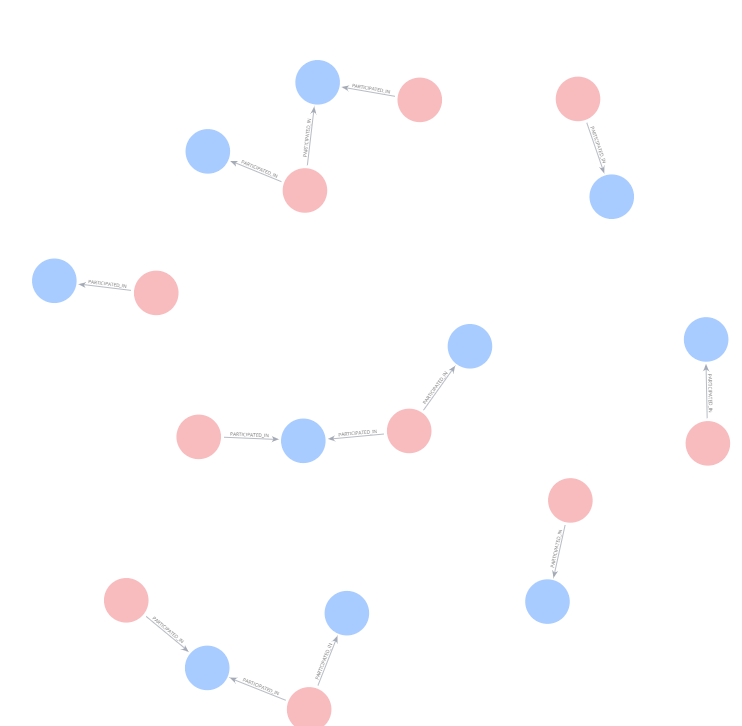

In [15]:
Image(filename="participated.png")

In [11]:
# Add ENCOUNTERED relationships

encountered_queries = [
"""
MATCH (p1:Player {id: 1}), (n1:NPC {id: 1})
CREATE (p1)-[:ENCOUNTERED {dialogue: ["Hello adventurer.", "Have you seen the Lost Artifact?", "I'll reward you if you find it."]}]->(n1);
""",
"""
MATCH (p2:Player {id: 2}), (n2:NPC {id: 4})
CREATE (p2)-[:ENCOUNTERED {dialogue: ["Greetings!", "The dragon has been causing chaos.", "Please help us defeat it."]}]->(n2);
""",
"""
MATCH (p3:Player {id: 3}), (n3:NPC {id: 4})
CREATE (p3)-[:ENCOUNTERED {dialogue: ["Help!", "The princess has been kidnapped.", "Can you rescue her?"]}] ->(n3);
""",
"""
MATCH (p4:Player {id: 4}), (n4:NPC {id: 5})
CREATE (p4)-[:ENCOUNTERED {dialogue: ["Hello young one.", "I need some Magic Herbs.", "Will you gather them for me?"]}] ->(n4);
""",
"""
MATCH (p5:Player {id: 5}), (n5:NPC {id: 6})
CREATE (p5)-[:ENCOUNTERED {dialogue: ["Psst.", "There's a Dark Fortress up ahead.", "Can you infiltrate it?"]}] ->(n5);
""",
"""
MATCH (p6:Player {id: 6}), (n6:NPC {id: 7})
CREATE (p6)-[:ENCOUNTERED {dialogue: ["Adventurer!", "Our village is in danger.", "Will you protect us?"]}] ->(n6);
""",
"""
MATCH (p7:Player {id: 7}), (n7:NPC {id: 2})
CREATE (p7)-[:ENCOUNTERED {dialogue: ["Ah, just in time.", "Someone stole my sword.", "Retrieve it for me."]}]->(n7);
""",
"""
MATCH (p8:Player {id: 8}), (n8:NPC {id: 3})
CREATE (p8)-[:ENCOUNTERED {dialogue: ["Traveler!", "I need an escort to the next town.", "Can you help?"]}] ->(n8);
""",
"""
MATCH (p9:Player {id: 9}), (n9:NPC {id: 9})
CREATE (p9)-[:ENCOUNTERED {dialogue: ["Beware!", "The Cursed Tomb lies ahead.", "Can you seal it?"]}] ->(n9);
""",
"""
MATCH (p10:Player {id: 10}), (n10:NPC {id: 10})
CREATE (p10)-[:ENCOUNTERED {dialogue: ["Adventurer, listen.", "An evil sorcerer plagues our land.", "Vanquish him for us."]}]->(n10);
"""
]

with driver.session() as session:
    for query in encountered_queries:
        session.execute_write(query_neo, query)

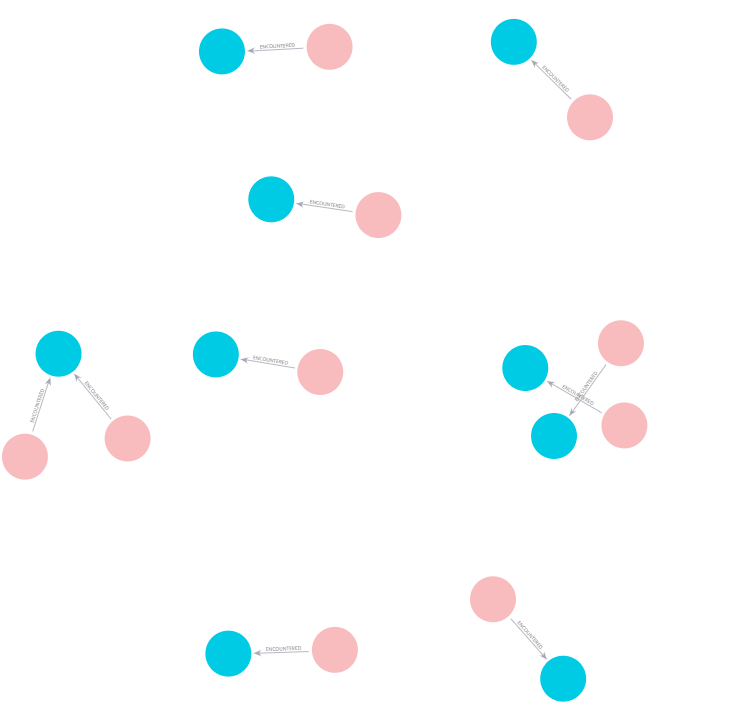

In [16]:
Image(filename="encountered.png")

In [12]:
# Add FRIENDS_WITH relationships

friends_queries = [
"""
MATCH (p1:Player {id: 1}), (p2:Player {id: 2})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-01",
  shared_quests: ["The Lost Artifact", "Defeat the Dragon"],
  mutual_enemies: ["Infernal Incubus", "Flamekeeper Elemental"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 1}), (p2:Player {id: 3})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-02",
  shared_quests: ["Rescue the Princess", "Gather Magic Herbs"],
  mutual_enemies: ["Blazing Phoenix", "Skeletal Mage"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 2}), (p2:Player {id: 3})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-03",
  shared_quests: ["Defeat the Dragon", "Rescue the Princess"],
  mutual_enemies: ["Winged Serpent", "Cave Spider"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 3}), (p2:Player {id: 4})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-04",
  shared_quests: ["Gather Magic Herbs", "Infiltrate the Dark Fortress"],
  mutual_enemies: ["Dire Bat", "Corrupted Alchemist"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 4}), (p2:Player {id: 5})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-05",
  shared_quests: ["Infiltrate the Dark Fortress", "Protect the Village"],
  mutual_enemies: ["Fire Salamander", "Forest Spirit"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 5}), (p2:Player {id: 6})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-06",
  shared_quests: ["Protect the Village", "Retrieve the Stolen Sword"],
  mutual_enemies: ["Wandering Yeti", "Clockwork Guardian"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 6}), (p2:Player {id: 7})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-07",
  shared_quests: ["Retrieve the Stolen Sword", "Escort the Merchant"],
  mutual_enemies: ["Royal Griffin", "Lightning Jinn"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 7}), (p2:Player {id: 8})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-08",
  shared_quests: ["Escort the Merchant", "Seal the Cursed Tomb"],
  mutual_enemies: ["Demonic Kraken", "Ghostly Archer"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 8}), (p2:Player {id: 9})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-09",
  shared_quests: ["Seal the Cursed Tomb", "Vanquish the Evil Sorcerer"],
  mutual_enemies: ["Voracious Goblin", "Mud Troll"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 9}), (p2:Player {id: 10})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-10",
  shared_quests: ["The Lost Artifact", "Defeat the Dragon"],
  mutual_enemies: ["Wandering Yeti", "Demonic Kraken"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 7}), (p2:Player {id: 10})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-11",
  shared_quests: ["Rescue the Princess", "Gather Magic Herbs"],
  mutual_enemies: ["Corrupted Alchemist", "Fire Salamander"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 2}), (p2:Player {id: 9})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-12",
  shared_quests: ["Gather Magic Herbs", "Infiltrate the Dark Fortress"],
  mutual_enemies: ["Dire Bat", "Blazing Phoenix"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 3}), (p2:Player {id: 10})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-13",
  shared_quests: ["Infiltrate the Dark Fortress", "Protect the Village"],
  mutual_enemies: ["Winged Serpent", "Cave Spider"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 1}), (p2:Player {id: 4})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-14",
  shared_quests: ["Protect the Village", "Retrieve the Stolen Sword"],
  mutual_enemies: ["Forest Spirit", "Wandering Yeti"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 1}), (p2:Player {id: 5})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-15",
  shared_quests: ["Retrieve the Stolen Sword", "Escort the Merchant"],
  mutual_enemies: ["Clockwork Guardian", "Royal Griffin"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 2}), (p2:Player {id: 5})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-16",
  shared_quests: ["Escort the Merchant", "Seal the Cursed Tomb"],
  mutual_enemies: ["Lightning Jinn", "Demonic Kraken"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 3}), (p2:Player {id: 8})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-17",
  shared_quests: ["The Lost Artifact", "Defeat the Dragon"], 
  mutual_enemies: ["Ghostly Archer", "Voracious Goblin"]
}]->(p2);
"""
]

with driver.session() as session:
    for query in friends_queries:
        session.execute_write(query_neo, query)

In [13]:
# Add FRIENDS_WITH relationships

friends_queries = [
"""
MATCH (p1:Player {id: 2}), (p2:Player {id: 1})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-01",
  shared_quests: ["The Lost Artifact", "Defeat the Dragon"],
  mutual_enemies: ["Infernal Incubus", "Flamekeeper Elemental"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 3}), (p2:Player {id: 1})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-02",
  shared_quests: ["Rescue the Princess", "Gather Magic Herbs"],
  mutual_enemies: ["Blazing Phoenix", "Skeletal Mage"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 3}), (p2:Player {id: 2})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-03",
  shared_quests: ["Defeat the Dragon", "Rescue the Princess"],
  mutual_enemies: ["Winged Serpent", "Cave Spider"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 4}), (p2:Player {id: 3})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-04",
  shared_quests: ["Gather Magic Herbs", "Infiltrate the Dark Fortress"],
  mutual_enemies: ["Dire Bat", "Corrupted Alchemist"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 5}), (p2:Player {id: 4})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-05",
  shared_quests: ["Infiltrate the Dark Fortress", "Protect the Village"],
  mutual_enemies: ["Fire Salamander", "Forest Spirit"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 6}), (p2:Player {id: 5})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-06",
  shared_quests: ["Protect the Village", "Retrieve the Stolen Sword"],
  mutual_enemies: ["Wandering Yeti", "Clockwork Guardian"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 7}), (p2:Player {id: 6})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-07",
  shared_quests: ["Retrieve the Stolen Sword", "Escort the Merchant"],
  mutual_enemies: ["Royal Griffin", "Lightning Jinn"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 8}), (p2:Player {id: 7})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-08",
  shared_quests: ["Escort the Merchant", "Seal the Cursed Tomb"],
  mutual_enemies: ["Demonic Kraken", "Ghostly Archer"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 9}), (p2:Player {id: 8})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-09",
  shared_quests: ["Seal the Cursed Tomb", "Vanquish the Evil Sorcerer"],
  mutual_enemies: ["Voracious Goblin", "Mud Troll"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 10}), (p2:Player {id: 9})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-10",
  shared_quests: ["The Lost Artifact", "Defeat the Dragon"],
  mutual_enemies: ["Wandering Yeti", "Demonic Kraken"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 10}), (p2:Player {id: 7})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-11",
  shared_quests: ["Rescue the Princess", "Gather Magic Herbs"],
  mutual_enemies: ["Corrupted Alchemist", "Fire Salamander"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 9}), (p2:Player {id: 2})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-12",
  shared_quests: ["Gather Magic Herbs", "Infiltrate the Dark Fortress"],
  mutual_enemies: ["Dire Bat", "Blazing Phoenix"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 10}), (p2:Player {id: 3})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-13",
  shared_quests: ["Infiltrate the Dark Fortress", "Protect the Village"],
  mutual_enemies: ["Winged Serpent", "Cave Spider"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 4}), (p2:Player {id: 1})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-14",
  shared_quests: ["Protect the Village", "Retrieve the Stolen Sword"],
  mutual_enemies: ["Forest Spirit", "Wandering Yeti"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 5}), (p2:Player {id: 1})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-15",
  shared_quests: ["Retrieve the Stolen Sword", "Escort the Merchant"],
  mutual_enemies: ["Clockwork Guardian", "Royal Griffin"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 5}), (p2:Player {id: 2})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2021-10-16",
  shared_quests: ["Escort the Merchant", "Seal the Cursed Tomb"],
  mutual_enemies: ["Lightning Jinn", "Demonic Kraken"]
}]->(p2);
""",
"""
MATCH (p1:Player {id: 8}), (p2:Player {id: 3})
CREATE (p1)-[:FRIENDS_WITH {
  friendship_date: "2022-10-17",
  shared_quests: ["The Lost Artifact", "Defeat the Dragon"], 
  mutual_enemies: ["Ghostly Archer", "Voracious Goblin"]
}]->(p2);
"""
]

with driver.session() as session:
    for query in friends_queries:
        session.execute_write(query_neo, query)

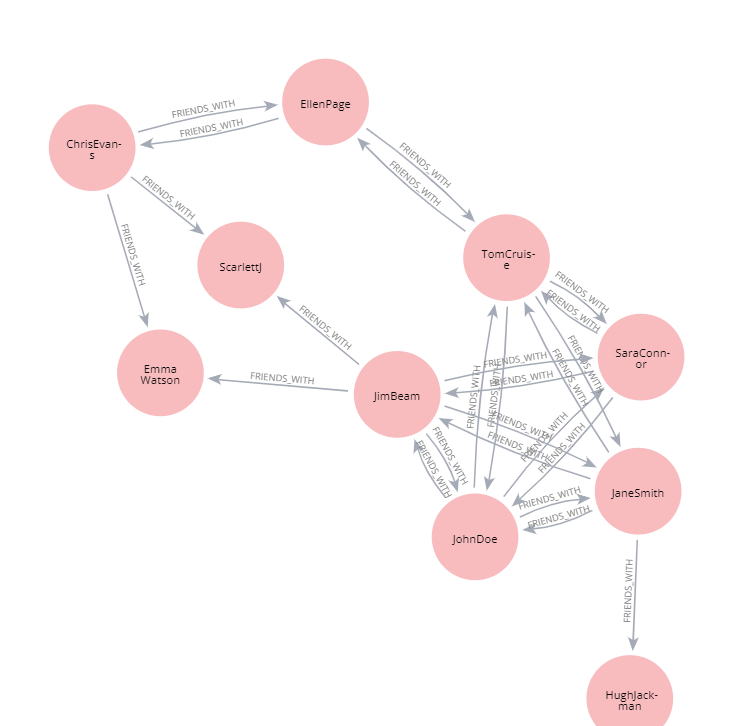

In [17]:
Image(filename="friends.png")